# 초기 탈모 예측

##일상생활과 연관된 몇 가지 속성으로 탈모 정도를 분류하는 인공지능을 만들어 보자


- 2017년부터 2021년까지 5년 간 원형 탈모증 등 병적 탈모로 병,의원에서 진료를 받은 국민이 115만 명에 달하는 것으로 나타났다.
- 병적 탈모는 유전이나 노화로 인한 정상 탈모와 달리, 건강 악화나 약 부작용 등으로 인한 탈모를 말한다. 특히 화병, 우울증 같이 스트레스에서 비롯된 경우가 가장 많다


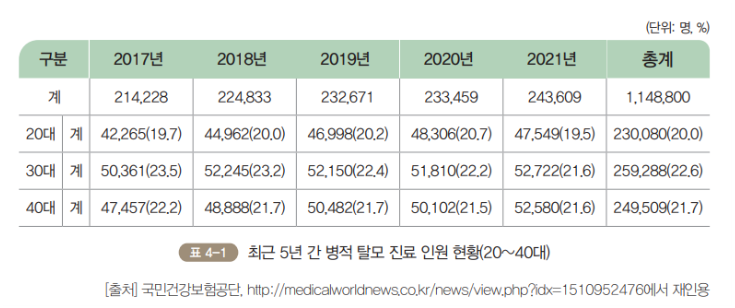

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder, OrdinalEncoder

In [2]:
DATA = './hair_loss_synthetic_5000.xlsx'
#dandruff 속성의 'None'값을 NaN(결측치)로 변환하는 것을 막기 위해 na_filter를 쓴다.
df = pd.read_excel(DATA, na_filter=False)
df.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,Few,1,Low,0,0,Low,No,Y,
1,A lot,6,Very High,0,0,Very High,No,Y,Many
2,Medium,2,Low,1,0,Low,Yes,N,Few
3,Medium,1,Low,1,3,Low,No,Y,
4,Few,1,Low,0,2,Low,No,N,


**400명의 탈모 관련 정보**

머리숱, 두피압, 커피 섭취량, 스트레스 정도, 수영 여부 등등 정보가 있음.


- 머리숱 정도 : Few, Medium, Many, A lot
- 두피압, 스트레스 : Low, Medium, High, Very High
- 일일 수영 여부, 머리 감기 여부 : Y, N
- 비듬 정도 : None, Few, Many





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   hair_loss               5000 non-null   object
 1   stay_up_late            5000 non-null   int64 
 2   pressure_level          5000 non-null   object
 3   coffee_consumed         5000 non-null   int64 
 4   brain_working_duration  5000 non-null   int64 
 5   stress_level            5000 non-null   object
 6   swimming                5000 non-null   object
 7   hair_washing            5000 non-null   object
 8   dandruff                5000 non-null   object
dtypes: int64(3), object(6)
memory usage: 351.7+ KB


모두 값이 있고 결측치 처리가 필요 없음을 알 수 있음.

In [4]:
df.isna().sum( )

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
stress_level              0
swimming                  0
hair_washing              0
dandruff                  0
dtype: int64

hair_loss                 탈모여부 -> 타겟  ( ordinal )  
stay_up_late              늦게 자는 습관 [ 수치형 ]    
pressure_level            외부 압박 수준 [ 범주형 ]  ( ordinal )  
coffee_consumed           커피 섭취 [ 수치형 ]    
brain_working_duration    두뇌 노동 시간 [ 수치형 ]    
stress_level              스트레스 수준 [ 범주형 ]   ( ordinal )  
swimming                  수영 여부 [ 범주형 ]  ( one-hot )  
hair_washing              머리 감기 빈도 [ 범주형 ]  ( one-hot )  
dandruff                  비듬 여부 [ 범주형 ]  ( ordinal )  => 여기서 None은 비듬이 없는거임  

- 타겟 정의 / 피쳐 분류

In [5]:
targetSR = df[df.columns[0]]
featureDF = df[df.columns[1:]]
display(targetSR.shape, featureDF.shape)

(5000,)

(5000, 8)

In [6]:
targetSR.value_counts()

hair_loss
Few       2149
Medium    2076
Many       497
A lot      278
Name: count, dtype: int64

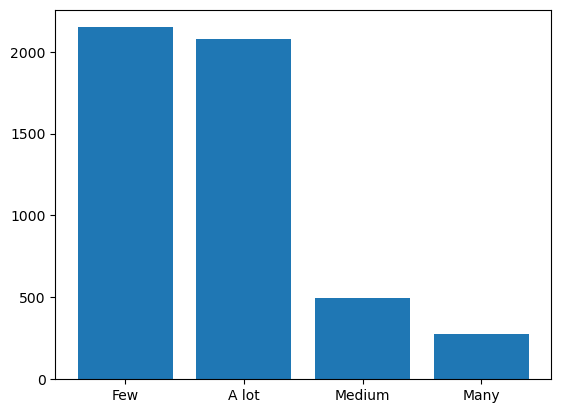

In [7]:
plt.bar(targetSR.unique(),targetSR.value_counts())
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)


- 문자로 이루어진 데이터를 인코딩






In [9]:
from sklearn.compose import ColumnTransformer

cat_cols = ['swimming', 'hair_washing'] ## one-hot
ord_cols = [ 'pressure_level', 'stress_level', 'dandruff']
# num_cols = ['age', 'income'] ## scale

ord_categories = [
    ['Low', 'Medium', 'High', 'Very High'],
    ['Low', 'Medium', 'High', 'Very High'],
    ['None', 'Few', 'Many']
]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('ord', OrdinalEncoder(
            categories=ord_categories,
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ord_cols)
        # ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)




In [10]:
X_train_p = preprocess.fit_transform(x_train)
X_test_p  = preprocess.transform(x_test)
display(X_train_p, X_test_p)

array([[ 1.,  0.,  0., ...,  3.,  6., 10.],
       [ 1.,  0.,  1., ...,  2.,  0.,  7.],
       [ 1.,  0.,  1., ...,  2.,  1.,  2.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  4., 18.],
       [ 1.,  0.,  1., ...,  1.,  1.,  7.],
       [ 1.,  0.,  1., ...,  0.,  9., 10.]], shape=(4000, 10))

array([[ 1.,  0.,  1., ...,  4.,  0.,  1.],
       [ 1.,  0.,  1., ...,  3.,  2.,  1.],
       [ 1.,  0.,  0., ...,  3.,  1.,  7.],
       ...,
       [ 1.,  0.,  0., ...,  2.,  1.,  0.],
       [ 1.,  0.,  0., ...,  3.,  0., 10.],
       [ 0.,  1.,  0., ...,  1.,  0.,  2.]], shape=(1000, 10))

In [11]:
# 2) 전체 출력 컬럼명
out_cols = preprocess.get_feature_names_out()
print(out_cols)



['cat__swimming_No' 'cat__swimming_Yes' 'cat__hair_washing_N'
 'cat__hair_washing_Y' 'ord__pressure_level' 'ord__stress_level'
 'ord__dandruff' 'remainder__stay_up_late' 'remainder__coffee_consumed'
 'remainder__brain_working_duration']


In [12]:
# # ## Target Encoder
# # ## 타겟 인코더 - label
# print(y_train.sort_values())
# lbSR = LabelEncoder()
# y_train_lb = lbSR.fit_transform(y_train)
# y_test_lb  = lbSR.transform(y_test)

In [13]:
## 타겟 인코더 - ordinal
print(y_train)

mapping = {'Few':0,'Medium':1, 'Many':2, 'A lot':3}
y_train_ord = y_train.map(mapping)
y_test_ord  = y_test.map(mapping)
display(y_train_ord, y_test_ord)

3076     A lot
1997       Few
2352    Medium
2621      Many
1175    Medium
         ...  
4939    Medium
4909    Medium
3836      Many
3036    Medium
2209      Many
Name: hair_loss, Length: 4000, dtype: object


3076    3
1997    0
2352    1
2621    2
1175    1
       ..
4939    1
4909    1
3836    2
3036    1
2209    2
Name: hair_loss, Length: 4000, dtype: int64

3085    1
382     1
4164    1
3201    1
60      0
       ..
4494    1
2952    1
1470    1
3056    1
3728    0
Name: hair_loss, Length: 1000, dtype: int64

In [14]:
df1 = pd.DataFrame(X_train_p)
df1.drop(columns = [0,2], inplace=True)
display(df1)
y_train_ord = y_train_ord.reset_index(drop=True)
df2 = pd.DataFrame(y_train_ord)
display(df2)
df3 = pd.concat((df1, df2), axis='columns')
display(df3)
display(df3.corr())

# 2) 전체 출력 컬럼명
out_cols = preprocess.get_feature_names_out()
print(out_cols)



,1,3,4,5,6,7,8,9
0,0.0,1.0,1.0,2.0,2.0,3.0,6.0,10.0
1,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,7.0
2,0.0,0.0,0.0,3.0,-1.0,2.0,1.0,2.0
3,0.0,0.0,3.0,3.0,2.0,4.0,4.0,7.0
4,1.0,0.0,0.0,0.0,-1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.0
3996,0.0,1.0,0.0,2.0,-1.0,2.0,1.0,3.0
3997,0.0,1.0,3.0,2.0,2.0,0.0,4.0,18.0
3998,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,7.0


,hair_loss
0,3
1,0
2,1
3,2
4,1
...,...
3995,1
3996,1
3997,2
3998,1


,1,3,4,5,6,7,8,9,hair_loss
0,0.0,1.0,1.0,2.0,2.0,3.0,6.0,10.0,3
1,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,7.0,0
2,0.0,0.0,0.0,3.0,-1.0,2.0,1.0,2.0,1
3,0.0,0.0,3.0,3.0,2.0,4.0,4.0,7.0,2
4,1.0,0.0,0.0,0.0,-1.0,2.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.0,1
3996,0.0,1.0,0.0,2.0,-1.0,2.0,1.0,3.0,1
3997,0.0,1.0,3.0,2.0,2.0,0.0,4.0,18.0,2
3998,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,7.0,1


,1,3,4,5,6,7,8,9,hair_loss
1,1.000000,-0.020650,-0.185650,-0.200304,-0.179989,-0.074466,-0.164748,-0.130307,-0.198561
3,-0.020650,1.000000,0.045915,0.032345,0.038870,0.028394,0.049310,0.019820,0.060224
4,-0.185650,0.045915,1.000000,0.654883,0.636937,0.329705,0.563025,0.458473,0.722800
5,-0.200304,0.032345,0.654883,1.000000,0.656189,0.323411,0.560032,0.479763,0.739810
6,-0.179989,0.038870,0.636937,0.656189,1.000000,0.311768,0.560755,0.466971,0.736754
7,-0.074466,0.028394,0.329705,0.323411,0.311768,1.000000,0.297964,0.255588,0.423818
8,-0.164748,0.049310,0.563025,0.560032,0.560755,0.297964,1.000000,0.438250,0.677504
9,-0.130307,0.019820,0.458473,0.479763,0.466971,0.255588,0.438250,1.000000,0.566750
hair_loss,-0.198561,0.060224,0.722800,0.739810,0.736754,0.423818,0.677504,0.566750,1.000000


['cat__swimming_No' 'cat__swimming_Yes' 'cat__hair_washing_N'
 'cat__hair_washing_Y' 'ord__pressure_level' 'ord__stress_level'
 'ord__dandruff' 'remainder__stay_up_late' 'remainder__coffee_consumed'
 'remainder__brain_working_duration']


In [15]:
X_train_p.shape, X_test_p.shape, y_train_ord.shape, y_test_ord.shape

((4000, 10), (1000, 10), (4000,), (1000,))

X_train_p, X_test_p, y_train_ord, y_test_ord ==> 이렇게 사용하면 됨

# k-NN 모델 학습하기 
<hr>

- k-NN 알고리즘인 KNeighborsClassifier 호출하고 모델을 불러옴.
- **n_neighbors** : k 값







In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [17]:
#knn 모델 학습
knn_model.fit(X_train_p, y_train_ord)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
knn_model.score(X_train_p, y_train_ord)

0.901

In [19]:
knn_model.score(X_test_p, y_test_ord)

0.867

In [20]:
## 성능지표
from sklearn.metrics import classification_report

pred = knn_model.predict(X_test_p)
print(classification_report(y_test_ord, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       430
           1       0.91      0.84      0.87       415
           2       0.82      0.87      0.84        99
           3       0.75      0.68      0.71        56

    accuracy                           0.87      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.87      0.87      0.87      1000



In [21]:
report_dict = classification_report(y_test_ord, pred, output_dict=True)
report_df1 = pd.DataFrame(report_dict).T   # .T 하면 보기 좋게 행/열 정리됨

display(report_df1)

,precision,recall,f1-score,support
0,0.858388,0.916279,0.886389,430.000
1,0.906494,0.840964,0.872500,415.000
2,0.819048,0.868687,0.843137,99.000
3,0.745098,0.678571,0.710280,56.000
accuracy,0.867000,0.867000,0.867000,0.867
macro avg,0.832257,0.826125,0.828077,1000.000
weighted avg,0.868113,0.867000,0.866481,1000.000


<hr>

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [24]:
pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('dt_cls', KNeighborsClassifier())
                            ])

## GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict
##       -> 모델 인스턴스
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_ = { "dt_cls__n_neighbors" : [3, 5, 7, 9, 11],
                "dt_cls__weights" : ['uniform', 'distance'],
                "dt_cls__metric" : ['euclidean', 'manhattan', 'minkowski']}

## GridSearchCV 인스턴스 생성
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict_,
                      cv=cv,                   # StratifiedKFold 추천
                      scoring='recall_macro',  ## 생각해보기 ->
                      n_jobs=-1,
                    #   refit=True, ## 최적의 값을 찾으면 다시 그걸로 하는 그런거
                      return_train_score=True)


In [25]:
display(np.isnan(X_train_p).sum(), y_train_ord.isna().sum())

np.int64(0)

np.int64(0)

In [26]:
## 교차검증 통한 최적의 하이퍼라마터 조사 및 성능 평가
gridCV.fit(x_train, y_train_ord)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'dt_cls__metric': ['euclidean', 'manhattan', ...], 'dt_cls__n_neighbors': [3, 5, ...], 'dt_cls__weights': ['uniform', 'distance']}"
,scoring,'recall_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('cat', ...), ('ord', ...)]"


In [27]:
## 학습 후 모델 파라미터 통한 결과 확인
print(f'[Train] best_score_  : {gridCV.best_score_}')
print(f'[Test] score         : {gridCV.score(x_test, y_test_ord)}')
print(f'best_params_ : {gridCV.best_params_}')
print("Best Estimator:", gridCV.best_estimator_)

[Train] best_score_  : 0.8531151595386381
[Test] score         : 0.8336971337479183
best_params_ : {'dt_cls__metric': 'manhattan', 'dt_cls__n_neighbors': 7, 'dt_cls__weights': 'distance'}
Best Estimator: Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['swimming', 'hair_washing']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Very '
                                                                           

### KNN
**그냥 학습 시**  
-> [Train] : 0.903125  
[Test] : 0.775


**GridSearchCV** [최적의 하이퍼파라미터를 찾았을 시]  
-> [Train] : 0.8529
[Test] : 0.8381


In [28]:
## 성능지표
from sklearn.metrics import classification_report

best_knn = gridCV.best_estimator_     # preprocess + KNN 포함된 파이프라인
# print(best_knn)
pred = best_knn.predict(x_test)
# best_knn.score(x_test, y_test_ord)

- 성능지표 확인

In [29]:
print(classification_report(y_test_ord, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       430
           1       0.92      0.82      0.87       415
           2       0.85      0.85      0.85        99
           3       0.73      0.73      0.73        56

    accuracy                           0.87      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.87      0.87      0.87      1000



In [30]:
report_dict = classification_report(y_test_ord, pred, output_dict=True)
report_df2 = pd.DataFrame(report_dict).T   # .T 하면 보기 좋게 행/열 정리됨
# report_df2.info()
# report_df2.drop(['accuracy','macro avg','weighted avg'], axis='index', inplace=True)
display(report_df2)

,precision,recall,f1-score,support
0,0.842767,0.934884,0.886439,430.000
1,0.923913,0.819277,0.868455,415.000
2,0.848485,0.848485,0.848485,99.000
3,0.732143,0.732143,0.732143,56.000
accuracy,0.867000,0.867000,0.867000,0.867
macro avg,0.836827,0.833697,0.833880,1000.000
weighted avg,0.870814,0.867000,0.866577,1000.000


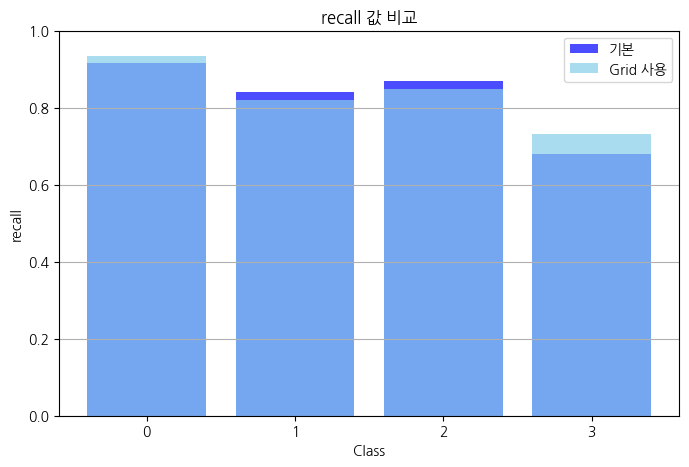

In [31]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# class 행만 추출

classes = ['0', '1', '2', '3']

plt.figure(figsize=(8,5))
plt.bar(classes, report_df1.loc[classes, 'recall'], alpha=0.7, label='기본',color='blue')
plt.bar(classes, report_df2.loc[classes, 'recall'], alpha=0.7, label='Grid 사용',color='skyblue')

plt.xlabel("Class")
plt.ylabel("recall")
plt.title("recall 값 비교")
plt.legend()
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


- 성능지표를 통해 비교

In [32]:
display((report_df2 > report_df1))
display((report_df2 > report_df1).sum())

,precision,recall,f1-score,support
0,False,True,True,False
1,True,False,False,False
2,True,False,True,False
3,False,True,True,False
accuracy,False,False,False,False
macro avg,True,True,True,False
weighted avg,True,False,True,False


precision    4
recall       3
f1-score     5
support      0
dtype: int64

# Logistic Regression 
<hr>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=5000)

logreg.fit(X_train_p, y_train_ord)
print('[train]',logreg.score(X_train_p, y_train_ord))
print('[test]',logreg.score(X_test_p, y_test_ord))


[train] 0.85675
[test] 0.847


In [34]:
# print(confusion_matrix(y_test_ord, model.predict(X_test_p)))
print(classification_report(y_test_ord, logreg.predict(X_test_p)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       430
           1       0.89      0.83      0.86       415
           2       0.75      0.89      0.81        99
           3       0.71      0.45      0.55        56

    accuracy                           0.85      1000
   macro avg       0.80      0.77      0.77      1000
weighted avg       0.85      0.85      0.84      1000



In [35]:
report_dict = classification_report(y_test_ord, pred, output_dict=True)
report_df3 = pd.DataFrame(report_dict).T   # .T 하면 보기 좋게 행/열 정리됨

display(report_df3)

,precision,recall,f1-score,support
0,0.842767,0.934884,0.886439,430.000
1,0.923913,0.819277,0.868455,415.000
2,0.848485,0.848485,0.848485,99.000
3,0.732143,0.732143,0.732143,56.000
accuracy,0.867000,0.867000,0.867000,0.867
macro avg,0.836827,0.833697,0.833880,1000.000
weighted avg,0.870814,0.867000,0.866577,1000.000


In [36]:
pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('dt_cls', KNeighborsClassifier())
                            ])

## GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict
##       -> 모델 인스턴스
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_ = { "dt_cls__n_neighbors" : [3, 5, 7, 9, 11],
                "dt_cls__weights" : ['uniform', 'distance'],
                "dt_cls__metric" : ['euclidean', 'manhattan', 'minkowski']}

## GridSearchCV 인스턴스 생성
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict_,
                      cv=cv,                   # StratifiedKFold 추천
                      scoring='recall_macro',  ## 생각해보기 ->
                      n_jobs=-1,
                    #   refit=True, ## 최적의 값을 찾으면 다시 그걸로 하는 그런거
                      return_train_score=True)


In [37]:
gridCV.fit(x_train, y_train_ord)

# pred = gridCV.predict(x_test)

print("Best params:", gridCV.best_params_)
print(f'[train] : {gridCV.best_score_}')
# print(classification_report(y_test_ord, pred))

Best params: {'dt_cls__metric': 'manhattan', 'dt_cls__n_neighbors': 7, 'dt_cls__weights': 'distance'}
[train] : 0.8531151595386381


In [49]:
pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('dt_cls', KNeighborsClassifier())
                            ])

In [51]:
pipeline.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('dt_cls', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('ord', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
bestLog = gridCV.best_estimator_
pred = bestLog.predict(x_test)


In [39]:
report_dict = classification_report(y_test_ord, pred, output_dict=True)
report_df45 = pd.DataFrame(report_dict).T   # .T 하면 보기 좋게 행/열 정리됨

display(report_df45)

,precision,recall,f1-score,support
0,0.842767,0.934884,0.886439,430.000
1,0.923913,0.819277,0.868455,415.000
2,0.848485,0.848485,0.848485,99.000
3,0.732143,0.732143,0.732143,56.000
accuracy,0.867000,0.867000,0.867000,0.867
macro avg,0.836827,0.833697,0.833880,1000.000
weighted avg,0.870814,0.867000,0.866577,1000.000


In [40]:
display((report_df45 > report_df3))
display((report_df45 > report_df3).sum())

,precision,recall,f1-score,support
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
accuracy,False,False,False,False
macro avg,False,False,False,False
weighted avg,False,False,False,False


precision    0
recall       0
f1-score     0
support      0
dtype: int64

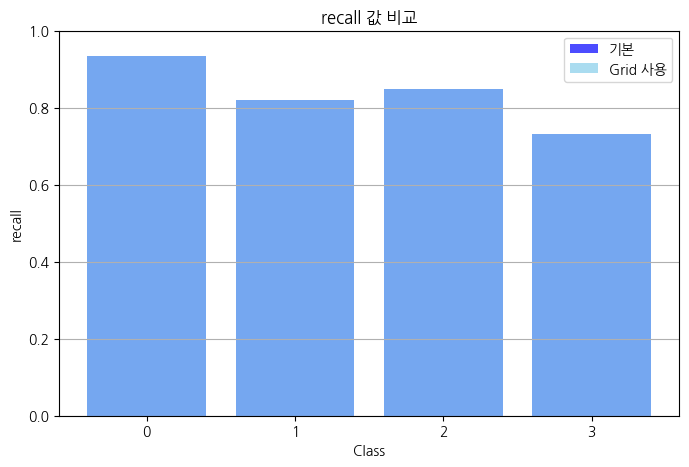

In [41]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# class 행만 추출
classes = ['0', '1', '2', '3']

plt.figure(figsize=(8,5))
plt.bar(classes, report_df3.loc[classes, 'recall'], alpha=0.7, label='기본',color='blue')
plt.bar(classes, report_df45.loc[classes, 'recall'], alpha=0.7, label='Grid 사용',color='skyblue')

plt.xlabel("Class")
plt.ylabel("recall")
plt.title("recall 값 비교")
plt.legend()
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


<hr>

In [42]:
pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('dt_cls', KNeighborsClassifier())
                            ])

## GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict
##       -> 모델 인스턴스
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_ = { "dt_cls__n_neighbors" : [3, 5, 7, 9, 11],
                "dt_cls__weights" : ['uniform', 'distance'],
                "dt_cls__metric" : ['euclidean', 'manhattan', 'minkowski']}

## GridSearchCV 인스턴스 생성
gridCV1 = GridSearchCV(pipeline,
                      param_grid=param_dict_,
                      cv=cv,                   # StratifiedKFold 추천
                      scoring='recall_macro',  ## 생각해보기 ->
                      n_jobs=-1,
                    #   refit=True, ## 최적의 값을 찾으면 다시 그걸로 하는 그런거
                      return_train_score=True)


In [43]:
gridCV1.fit(x_train, y_train_ord)

print(f'[train_scale] : {gridCV1.best_score_}')

[train_scale] : 0.845976642800353


In [44]:
best_log = gridCV1.best_estimator_
pred1 = best_log.predict(x_test)

In [45]:
report_dict = classification_report(y_test_ord, pred1, output_dict=True)
report_df4 = pd.DataFrame(report_dict).T   # .T 하면 보기 좋게 행/열 정리됨

display(report_df4)

,precision,recall,f1-score,support
0,0.868709,0.923256,0.895152,430.000
1,0.912371,0.853012,0.881694,415.000
2,0.807339,0.888889,0.846154,99.000
3,0.760870,0.625000,0.686275,56.000
accuracy,0.874000,0.874000,0.874000,0.874
macro avg,0.837322,0.822539,0.827319,1000.000
weighted avg,0.874714,0.874000,0.873019,1000.000


In [46]:
report_df4['diff'] = (report_df45.iloc[:5,1] - report_df4.iloc[:5,1])
## 스케일링 한거 - 스케일링 안한거 => 양수면 스케일링 한게 더 큰거임. 즉 더 좋은 모델
## -> 양수가 많은걸 볼 수 있음. 즉 스케일링한게 좋음
report_df4

,precision,recall,f1-score,support,diff
0,0.868709,0.923256,0.895152,430.000,0.011628
1,0.912371,0.853012,0.881694,415.000,-0.033735
2,0.807339,0.888889,0.846154,99.000,-0.040404
3,0.760870,0.625000,0.686275,56.000,0.107143
accuracy,0.874000,0.874000,0.874000,0.874,-0.007000
macro avg,0.837322,0.822539,0.827319,1000.000,NaN
weighted avg,0.874714,0.874000,0.873019,1000.000,NaN


In [47]:
# 전체 출력 컬럼명
out_cols = preprocess.get_feature_names_out()
print(out_cols)

['cat__swimming_No' 'cat__swimming_Yes' 'cat__hair_washing_N'
 'cat__hair_washing_Y' 'ord__pressure_level' 'ord__stress_level'
 'ord__dandruff' 'remainder__stay_up_late' 'remainder__coffee_consumed'
 'remainder__brain_working_duration']


### Logistic Regression 
**그냥 학습 시**  
-> [train] 0.846875
[test] 0.7625


**GridSearchCV** [최적의 하이퍼파라미터를 찾았을 시]  
-> [train] : 0.
[test] : 0.


- 성능지표 비교

In [48]:
display((report_df4 > report_df3))
display((report_df4 > report_df3).sum())

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

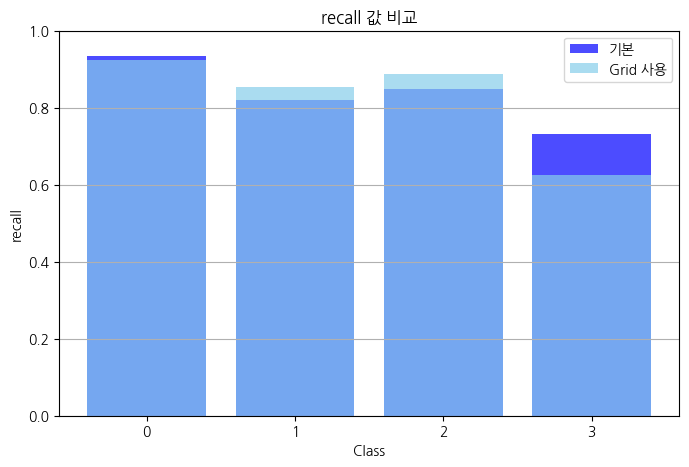

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# class 행만 추출
classes = ['0', '1', '2', '3']

plt.figure(figsize=(8,5))
plt.bar(classes, report_df3.loc[classes, 'recall'], alpha=0.7, label='기본',color='blue')
plt.bar(classes, report_df4.loc[classes, 'recall'], alpha=0.7, label='Grid 사용',color='skyblue')

plt.xlabel("Class")
plt.ylabel("recall")
plt.title("recall 값 비교")
plt.legend()
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


### 보팅
- 모델 합쳐서 돌리기

- 수연님 DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTree(x_train, y_train):
    ## ML CV, Pipeline 관련 => 모델 일반화/최적 하이퍼파라미터 조사 및 데이터 누수 해결
    from sklearn.model_selection import GridSearchCV
    from sklearn.pipeline import Pipeline 
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )
    ## ===================================================================
    ## 교차검증을 통한 일반화 성능 체크 + 최적의 하이퍼파라미터 찾기
    ## => GrdiSearchCV : 분류/회귀 교차검증, 최적 파라미터값, 성능 
    ## => Pipeline     : 튜닝 시 데이터 누수에 대한 보완 
    ## ===================================================================

    pipeline = Pipeline(steps=[  ('scaler', RobustScaler()), 
                                ('dt_cls', DecisionTreeClassifier(random_state=42)) ]) 

    param_dict_ = { "dt_cls__max_depth" :  [3,5,7], 
                    "dt_cls__criterion" : ['gini', 'entropy', 'log_loss']}

    deCV = GridSearchCV(pipeline,
                        param_grid=param_dict_, 
                        return_train_score=True,
                        scoring='recall_macro',
                        cv=cv)

    deCV.fit(x_train,y_train)
    return deCV
deCV = DecisionTree(X_train_p, y_train_ord)

- 수연님 랜덤포레스트

In [ ]:
def Random_Forest(cv,x_train,y_train):
    global gridCV
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV


    pipline = Pipeline(steps=[("RF",RandomForestClassifier(random_state=42))])


    param_ ={ "RF__n_estimators":[100,200,300],
        "RF__max_depth": [2, 3, 4, 5, 7, 10, 15, 20],
            "RF__criterion" : ['gini', 'entropy', 'log_loss']

    }
    ## GridSearchCV 인스턴스 생성
    gridCV = GridSearchCV(pipline,
                        param_grid=param_,
                        n_jobs=-1,
                        scoring="recall_macro",
                        cv= cv,
                        return_train_score=True,
                        refit=True)
    
    gridCV.fit(x_train,y_train)

    print(gridCV.best_score_)
    print(gridCV.best_params_)

    return gridCV
ranCV = Random_Forest(cv, X_train_p, y_train_ord )

0.8790389210405953
{'RF__criterion': 'entropy', 'RF__max_depth': 10, 'RF__n_estimators': 200}


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## 보팅 인스턴스 생성
vtModel = VotingClassifier(estimators=[('knn', knn_model), ('log', logreg), ('ran', ranCV), ('dec', deCV)]) # 0.8625
vtModel1 = VotingClassifier(estimators=[('knn', knn_model), ('ran', ranCV), ('dec', deCV)])
# vtModel1 = VotingClassifier(estimators=[('knn', knn_model), ('log', logreg), ('ran', ranCV)])
vtModel2 = VotingClassifier(estimators=[('knn', knn_model), ('log', logreg)])

## 보팅 동일 데이터셋으로 다른 학습 알고리즘으로 학습 진행
vtModel.fit(X_train_p, y_train_ord)
vtModel1.fit(X_train_p, y_train_ord)
vtModel2.fit(X_train_p, y_train_ord)

,estimators,"[('knn', ...), ('log', ...)]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


In [ ]:
## 학습 후 모델 파라미터 확인
print(f"classes_: {vtModel.classes_}")          # 품종 라벨
print(f"estimators_: {vtModel.estimators_}")    # 추정 모델 3개
print(f'named_estimators_: {vtModel.named_estimators_}')


classes_: [0 1 2 3]
estimators_: [KNeighborsClassifier(), LogisticRegression(max_iter=5000), GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('RF',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF__criterion': ['gini', 'entropy', 'log_loss'],
                         'RF__max_depth': [2, 3, 4, 5, 7, 10, 15, 20],
                         'RF__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall_macro'), GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('dt_cls',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt_cls__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt_cls__max_depth': [3,

In [ ]:
## 성능평가 => 하드 보팅
# print('4가지 사용 :',vtModel.score(X_train_p, y_train_ord))
print('3가지 사용 :',vtModel1.score(X_train_p, y_train_ord))
# print('2가지 사용 :',vtModel2.score(X_train_p, y_train_ord))

3가지 사용 : 0.92175


In [ ]:
# from sklearn.inspection import permutation_importance
# import pandas as pd

# result = permutation_importance(vtModel, X_test_p, y_test_ord, n_repeats=30, random_state=42)

# imp = pd.Series(result.importances_mean, index=X_test_p.columns).sort_values(ascending=False)
# print(imp.head(20))


In [ ]:
pred = vtModel.predict(X_test_p)
pred1 = vtModel1.predict(X_test_p)
pred2 = vtModel2.predict(X_test_p)
# print(classification_report(y_test_ord, pred))
a = classification_report(y_test_ord, pred, output_dict=True)
b = classification_report(y_test_ord, pred1, output_dict=True)
c = classification_report(y_test_ord, pred2, output_dict=True)
a

{'0': {'precision': 0.8518518518518519,
  'recall': 0.9627906976744186,
  'f1-score': 0.9039301310043668,
  'support': 430.0},
 '1': {'precision': 0.9554317548746518,
  'recall': 0.8265060240963855,
  'f1-score': 0.8863049095607235,
  'support': 415.0},
 '2': {'precision': 0.8584070796460177,
  'recall': 0.9797979797979798,
  'f1-score': 0.9150943396226415,
  'support': 99.0},
 '3': {'precision': 0.9523809523809523,
  'recall': 0.7142857142857143,
  'f1-score': 0.8163265306122449,
  'support': 56.0},
 'accuracy': 0.894,
 'macro avg': {'precision': 0.9045179096883684,
  'recall': 0.8708451039636246,
  'f1-score': 0.8804139776999942,
  'support': 1000.0},
 'weighted avg': {'precision': 0.9011161087875659,
  'recall': 0.894,
  'f1-score': 0.8928151191365052,
  'support': 1000.0}}

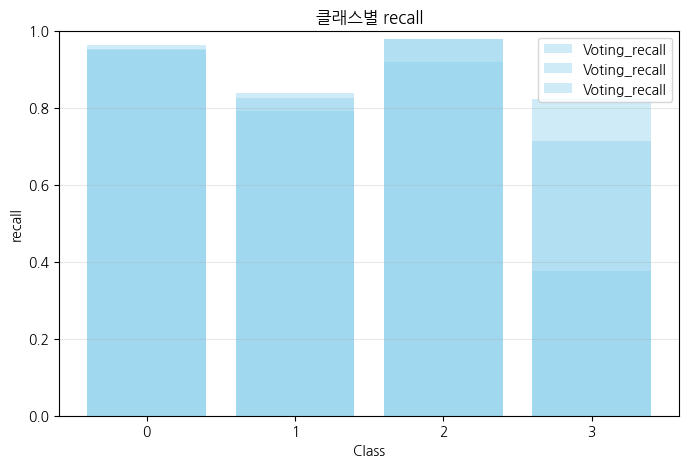

In [ ]:
classes = ['0', '1', '2', '3']
recalls = [a[k]['recall'] for k in classes] 
recalls1 = [b[k]['recall'] for k in classes] 
recalls2 = [c[k]['recall'] for k in classes] 

plt.figure(figsize=(8,5))
plt.bar(classes, recalls, label='Voting_recall', alpha = 0.4, color='skyblue')
plt.bar(classes, recalls1, label='Voting_recall', alpha = 0.4, color='skyblue')
plt.bar(classes, recalls2, label='Voting_recall', alpha = 0.4, color='skyblue')
plt.xlabel("Class")
plt.ylabel("recall")
plt.title("클래스별 recall")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()


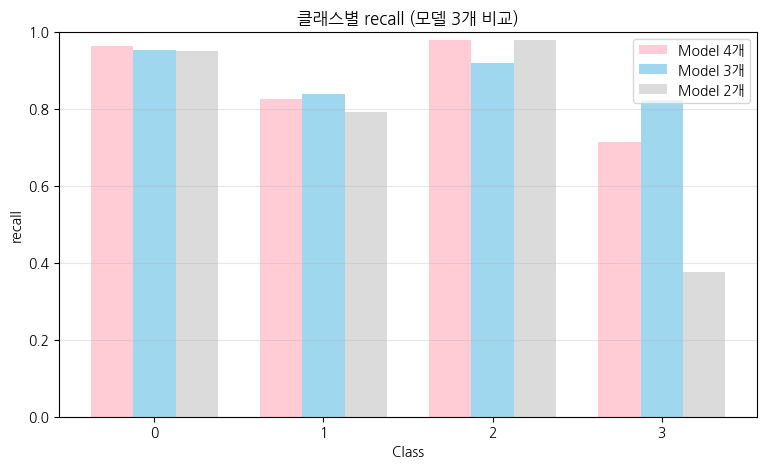

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

classes = ['0', '1', '2', '3']

recalls  = [a[k]['recall'] for k in classes]
recalls1  = [b[k]['recall'] for k in classes]
recalls2  = [c[k]['recall'] for k in classes]


x = np.arange(len(classes))   # [0,1,2,3]
w = 0.25                      # 막대 너비

plt.figure(figsize=(9,5))
plt.bar(x - w, recalls,  width=w, label='Model 4개', alpha=0.8, color='pink')
plt.bar(x,     recalls1, width=w, label='Model 3개', alpha=0.8, color='skyblue')
plt.bar(x + w, recalls2, width=w, label='Model 2개', alpha=0.8, color='lightgray')

plt.xticks(x, classes)
plt.xlabel("Class")
plt.ylabel("recall")
plt.title("클래스별 recall (모델 3개 비교)")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()


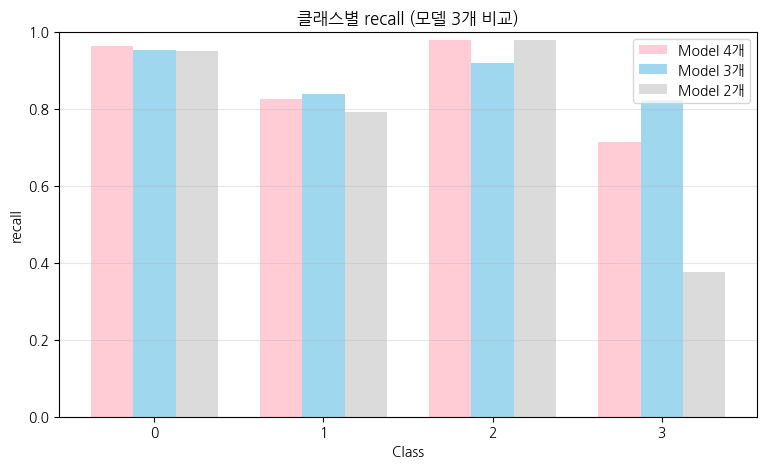

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

classes = ['0', '1', '2', '3']

recalls  = [a[k]['recall'] for k in classes]
recalls1 = [b[k]['recall'] for k in classes]
recalls2 = [c[k]['recall'] for k in classes]

x = np.arange(len(classes))   # [0,1,2,3]
w = 0.25                      # 막대 너비

plt.figure(figsize=(9,5))
plt.bar(x - w, recalls,  width=w, label='Model 4개', alpha=0.8, color='pink')
plt.bar(x,     recalls1, width=w, label='Model 3개', alpha=0.8, color='skyblue')
plt.bar(x + w, recalls2, width=w, label='Model 2개', alpha=0.8, color='lightgray')

plt.xticks(x, classes)
plt.xlabel("Class")
plt.ylabel("recall")
plt.title("클래스별 recall (모델 3개 비교)")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()


In [ ]:
print(classification_report(y_test_ord, pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       430
           1       0.96      0.83      0.89       415
           2       0.86      0.98      0.92        99
           3       0.95      0.71      0.82        56

    accuracy                           0.89      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.90      0.89      0.89      1000



              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.79      0.79      0.79        34
           2       0.64      0.88      0.74         8
           3       1.00      0.50      0.67         4

    accuracy                           0.81        80
   macro avg       0.83      0.76      0.77        80
weighted avg       0.82      0.81  